Key Features:

1. Temperature (°C): Average temperature of the region.
2. Humidity (%): Relative humidity recorded in the region.
3. PM2.5 Concentration (µg/m³): Fine particulate matter levels.
4. PM10 Concentration (µg/m³): Coarse particulate matter levels.
5. NO2 Concentration (ppb): Nitrogen dioxide levels.
6. SO2 Concentration (ppb): Sulfur dioxide levels.
7. CO Concentration (ppm): Carbon monoxide levels.
8. Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
9. Population Density (people/km²): Number of people per square kilometer in the region.

#### Target Variable: Air Quality Levels

1. Good: Clean air with low pollution levels.
2. Moderate: Acceptable air quality but with some pollutants present.
3. Poor: Noticeable pollution that may cause health issues for sensitive groups.
4. Hazardous: Highly polluted air posing serious health risks to the population.

## EDA 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [21]:
pop=pd.read_csv('updated_pollution_dataset.csv')

In [22]:
pop.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [23]:
pop.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [24]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [25]:
## fix the spaces in columns name 
pop.columns=pop.columns.str.strip()
pop.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [26]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


#### convert a new col for to analysis diference

In [27]:
## categories in classes     ## hence its a imbalanced data in target values 
pop['Air Quality'].value_counts()


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [28]:
pop.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [29]:
pop.rename(columns={'PM2.5': 'PM2'}, inplace=True)


In [30]:
pop.head(5)

,Temperature,Humidity,PM2,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [31]:
pop['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [32]:
pop.rename(columns={'Air Quality': 'Air_Quality'}, inplace=True)

In [33]:
pop.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5 non-null      float64
 1   Humidity                       5 non-null      float64
 2   PM2                            5 non-null      float64
 3   PM10                           5 non-null      float64
 4   NO2                            5 non-null      float64
 5   SO2                            5 non-null      float64
 6   CO                             5 non-null      float64
 7   Proximity_to_Industrial_Areas  5 non-null      float64
 8   Population_Density             5 non-null      int64  
 9   Air_Quality                    5 non-null      object 
dtypes: float64(8), int64(1), object(1)
memory usage: 528.0+ bytes


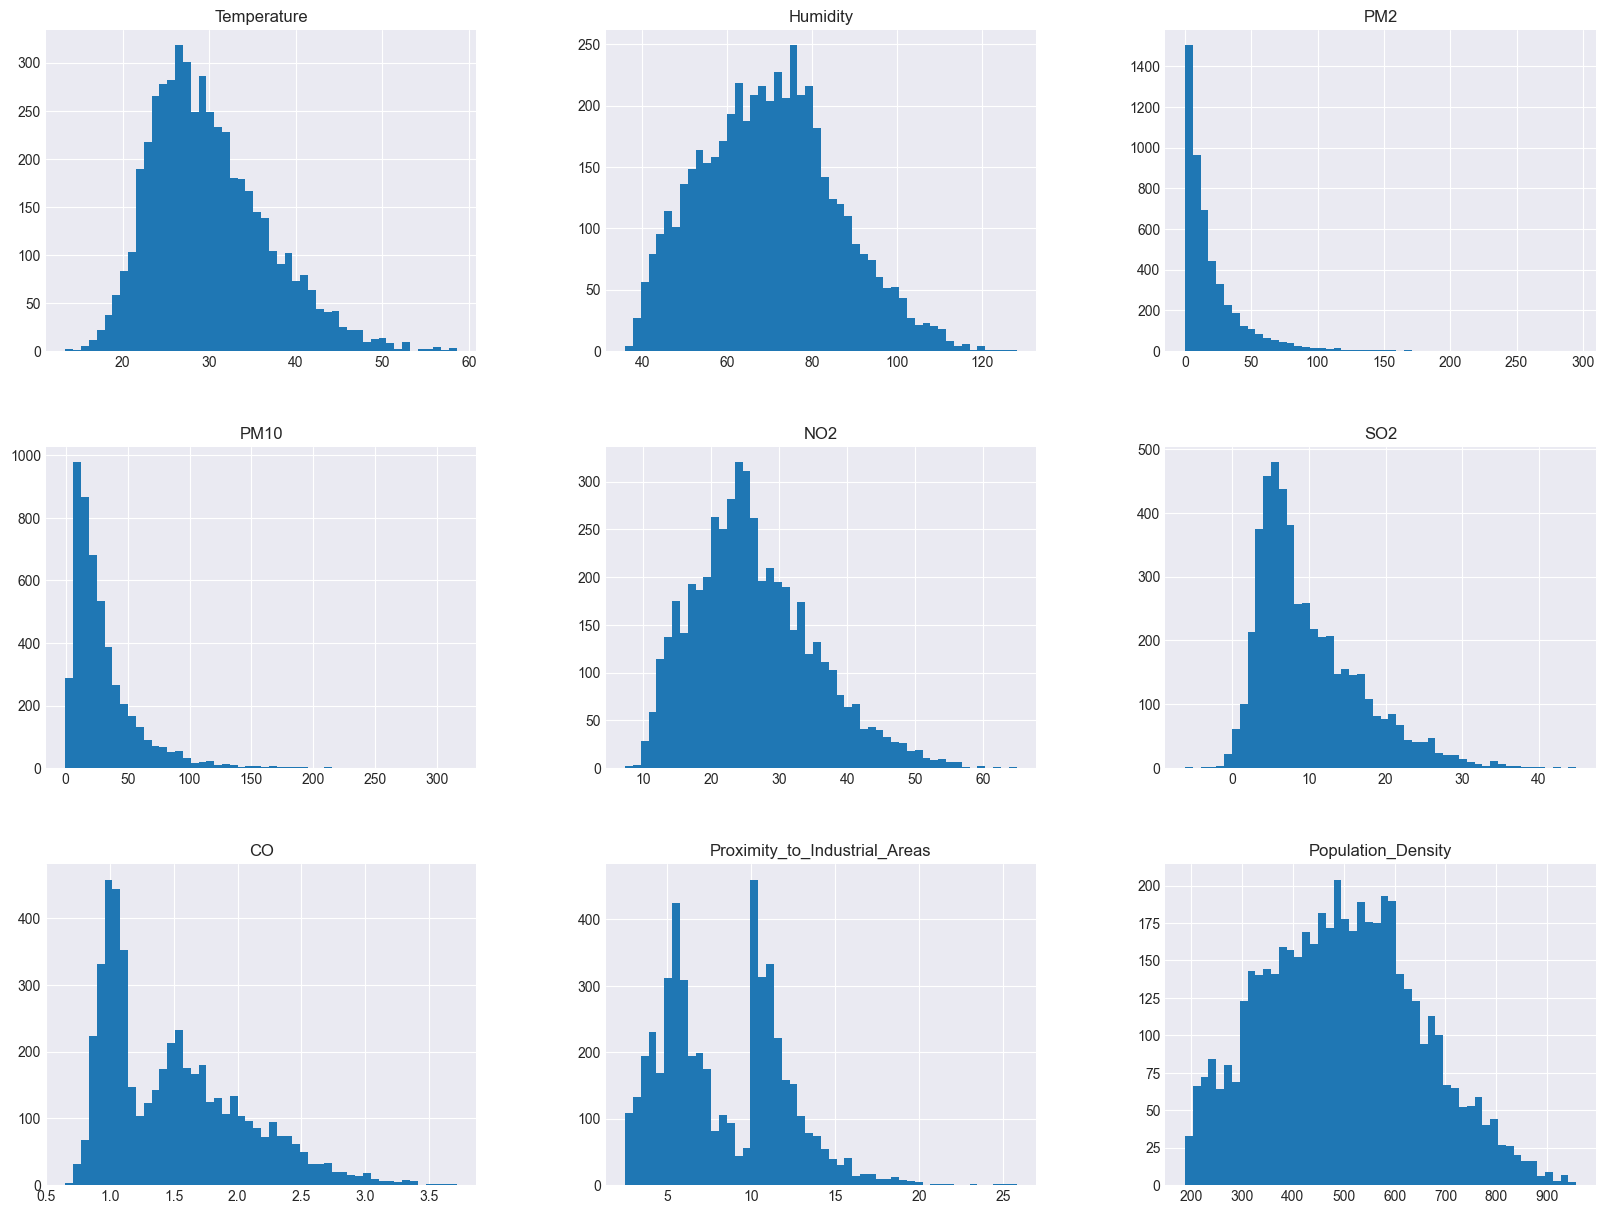

In [34]:
## plot density plot for all features
plt.style.use('seaborn-v0_8-darkgrid')
pop.hist(bins=50,figsize=(20,15))
plt.show()

In [35]:
## Percentage for Pie Chaart 
percentag=pop['Air_Quality'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'pie chart of Air Quality')

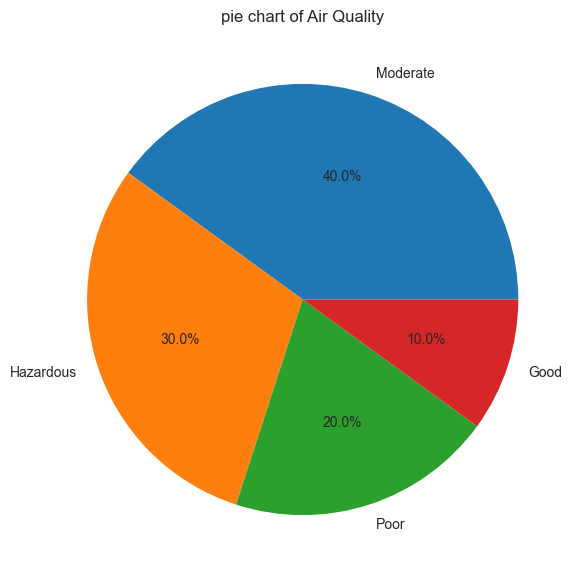

In [37]:
## plotting pie charts
Classlabels=['Moderate','Hazardous','Poor','Good']
plt.figure(figsize=(20,7))
plt.pie(percentag,labels=Classlabels,autopct='%1.1f%%')
plt.title('pie chart of Air Quality')

<Axes: xlabel='Air_Quality', ylabel='count'>

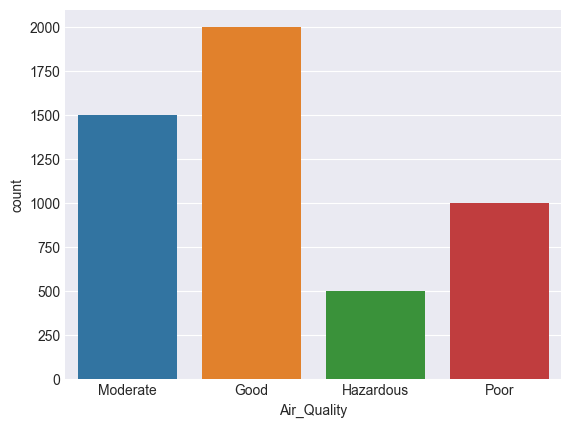

In [40]:
## now we can analys the overall quality in air by the value which are converted to 0 and 1
 
sns.countplot(x='Air_Quality',data=pop,legend='auto',hue='Air_Quality')

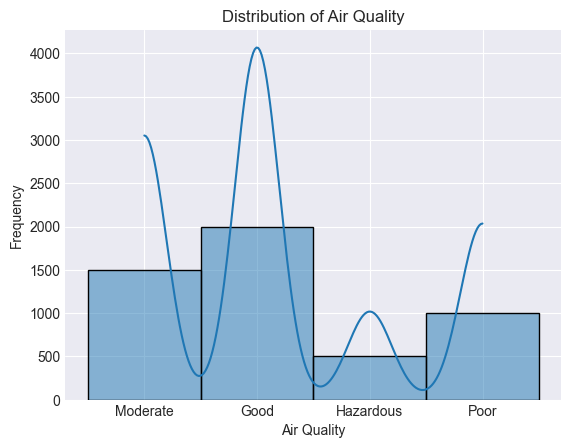

In [41]:
sns.histplot(pop['Air_Quality'], kde=True)  # kde=True adds a Kernel Density Estimate plot
plt.title('Distribution of Air Quality')
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.show()

In [43]:
### now we well transfor new clean Dataset 
pop.to_csv('pollution_new_Dataset.csv')

## Now start with Logitic regression for the classifiation dataset 

In [44]:
df=pd.read_csv('pollution_new_Dataset.csv')

In [45]:
df.head()

,Unnamed: 0,Temperature,Humidity,PM2,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [46]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [47]:
df.head()

,Temperature,Humidity,PM2,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


#### independent and dependent 

In [48]:

X=df[['Temperature','Humidity','PM2','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density']]
y=df['Air_Quality']

### Train , Test and Split and Logistic Regression Algo

In [49]:
df.shape

(5000, 10)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=45)

In [51]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)

d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
y_pred

array(['Good', 'Moderate', 'Moderate', ..., 'Poor', 'Good', 'Good'],
      dtype=object)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8144
[[994   0   1   0]
 [  1 107  12 123]
 [ 49   1 671  51]
 [  6  58 162 264]]
              precision    recall  f1-score   support

        Good       0.95      1.00      0.97       995
   Hazardous       0.64      0.44      0.52       243
    Moderate       0.79      0.87      0.83       772
        Poor       0.60      0.54      0.57       490

    accuracy                           0.81      2500
   macro avg       0.75      0.71      0.72      2500
weighted avg       0.80      0.81      0.81      2500



### Hyperpaarameter tuning and Cross Validation

   ### GridsearchCV

In [56]:
model=LogisticRegression()
penalty=['l1','l2','elasticnet']
c_values=[100,0,1.0,0.1,0.01]
solver=['lbfgs','liblinear', 'newton-cg','newton-cholesky','sag','saga']

In [57]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [58]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [59]:
## grid search cv
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [60]:
grid.fit(X_train,y_train)

d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\machine leraning file\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 0, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [61]:
grid.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [62]:
grid.best_score_

np.float64(0.9360000000000002)

In [63]:
y_predd=grid.predict(X_test)

In [64]:
score=accuracy_score(y_test,y_predd)
print(score)
cm=confusion_matrix(y_test,y_predd)
print(cm)
print(classification_report(y_test,y_predd))

0.9452
[[993   0   2   0]
 [  0 201   0  42]
 [  4   0 745  23]
 [  0  21  45 424]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       995
   Hazardous       0.91      0.83      0.86       243
    Moderate       0.94      0.97      0.95       772
        Poor       0.87      0.87      0.87       490

    accuracy                           0.95      2500
   macro avg       0.93      0.91      0.92      2500
weighted avg       0.94      0.95      0.94      2500



In [65]:
import pickle

pickle.dump(logistic,open('logistic.pkl','wb'))

In [66]:
pickle.dump(scaler,open('scaler.pkl','wb'))